In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buraydah
Processing Record 2 of Set 1 | verkhoyansk
Processing Record 3 of Set 1 | nenjiang
Processing Record 4 of Set 1 | vanimo
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | dwarka
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | marcona
City not found. Skipping...
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | simpang
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | hillsboro
Processing Record 17 of Set 1 | dulce grande
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | bus

Processing Record 35 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 36 of Set 4 | dayong
Processing Record 37 of Set 4 | savannah bight
Processing Record 38 of Set 4 | khandyga
Processing Record 39 of Set 4 | puyang
Processing Record 40 of Set 4 | havelock
Processing Record 41 of Set 4 | kostomuksha
Processing Record 42 of Set 4 | cabras
Processing Record 43 of Set 4 | yagodnoye
Processing Record 44 of Set 4 | sorrento
Processing Record 45 of Set 4 | richards bay
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | dunedin
Processing Record 48 of Set 4 | tamandare
Processing Record 49 of Set 4 | tura
Processing Record 50 of Set 4 | auki
Processing Record 1 of Set 5 | akdepe
Processing Record 2 of Set 5 | suez
Processing Record 3 of Set 5 | zhigansk
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | santiago
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | yarada
Processing Recor

Processing Record 25 of Set 8 | khora
Processing Record 26 of Set 8 | mangaratiba
Processing Record 27 of Set 8 | okhotsk
Processing Record 28 of Set 8 | lenger
Processing Record 29 of Set 8 | shahr-e kord
Processing Record 30 of Set 8 | baghdad
Processing Record 31 of Set 8 | benghazi
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | half moon bay
Processing Record 34 of Set 8 | eureka
Processing Record 35 of Set 8 | bulungu
Processing Record 36 of Set 8 | mecca
Processing Record 37 of Set 8 | skoghall
Processing Record 38 of Set 8 | akyab
Processing Record 39 of Set 8 | payo
Processing Record 40 of Set 8 | ust-shonosha
Processing Record 41 of Set 8 | gigmoto
Processing Record 42 of Set 8 | didwana
Processing Record 43 of Set 8 | xuanzhou
Processing Record 44 of Set 8 | rio gallegos
Processing Record 45 of Set 8 | huilong
Processing Record 46 of Set 8 | tuy hoa
Processing Record 47 of Set 8 | tapaua
City not found. Skipping...
Processing Record 48 of Set 8 | d

Processing Record 15 of Set 12 | wisconsin rapids
Processing Record 16 of Set 12 | kiruna
Processing Record 17 of Set 12 | san vicente de canete
Processing Record 18 of Set 12 | bahia blanca
Processing Record 19 of Set 12 | timmins
Processing Record 20 of Set 12 | kuminskiy
Processing Record 21 of Set 12 | visby
Processing Record 22 of Set 12 | itoman
Processing Record 23 of Set 12 | kosmynino
Processing Record 24 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 25 of Set 12 | saint-francois
Processing Record 26 of Set 12 | suileng
Processing Record 27 of Set 12 | mareeba
Processing Record 28 of Set 12 | angoche
Processing Record 29 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 30 of Set 12 | cullman
Processing Record 31 of Set 12 | sinnamary
Processing Record 32 of Set 12 | kahului
Processing Record 33 of Set 12 | tilichiki
Processing Record 34 of Set 12 | meulaboh
Processing Record 35 of Set 12 | labutta
City not found. Skipping...
Processing 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Buraydah,26.3260,43.9750,57.65,31,0,11.03,SA,2022-01-24 20:57:09
1,Verkhoyansk,67.5447,133.3850,-23.51,100,97,2.06,RU,2022-01-24 20:57:09
2,Nenjiang,49.1833,125.2167,-3.12,100,100,1.83,CN,2022-01-24 20:57:10
3,Vanimo,-2.6741,141.3028,77.16,86,97,2.57,PG,2022-01-24 20:57:10
4,Rikitea,-23.1203,-134.9692,78.53,70,100,19.10,PF,2022-01-24 20:57:10
5,Atuona,-9.8000,-139.0333,78.60,72,6,16.69,PF,2022-01-24 20:57:11
6,Cape Town,-33.9258,18.4232,70.12,84,75,5.01,ZA,2022-01-24 20:52:13
7,Dwarka,22.2394,68.9678,64.62,50,0,8.50,IN,2022-01-24 20:57:11
8,Mataura,-46.1927,168.8643,57.47,66,47,3.06,NZ,2022-01-24 20:57:11
9,Ushuaia,-54.8000,-68.3000,55.02,62,75,27.63,AR,2022-01-24 20:57:12


In [8]:
new_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Buraydah,SA,2022-01-24 20:57:09,26.3260,43.9750,57.65,31,0,11.03
1,Verkhoyansk,RU,2022-01-24 20:57:09,67.5447,133.3850,-23.51,100,97,2.06
2,Nenjiang,CN,2022-01-24 20:57:10,49.1833,125.2167,-3.12,100,100,1.83
3,Vanimo,PG,2022-01-24 20:57:10,-2.6741,141.3028,77.16,86,97,2.57
4,Rikitea,PF,2022-01-24 20:57:10,-23.1203,-134.9692,78.53,70,100,19.10
5,Atuona,PF,2022-01-24 20:57:11,-9.8000,-139.0333,78.60,72,6,16.69
6,Cape Town,ZA,2022-01-24 20:52:13,-33.9258,18.4232,70.12,84,75,5.01
7,Dwarka,IN,2022-01-24 20:57:11,22.2394,68.9678,64.62,50,0,8.50
8,Mataura,NZ,2022-01-24 20:57:11,-46.1927,168.8643,57.47,66,47,3.06
9,Ushuaia,AR,2022-01-24 20:57:12,-54.8000,-68.3000,55.02,62,75,27.63


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

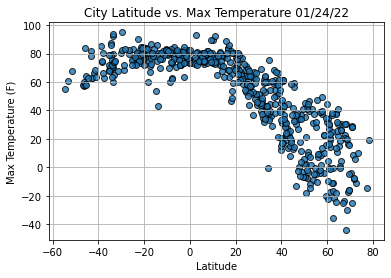

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

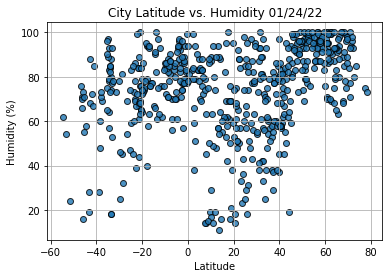

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

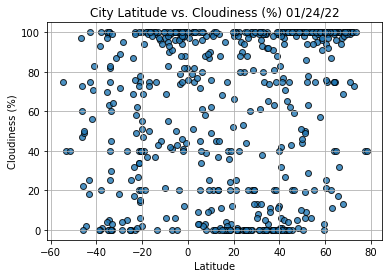

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

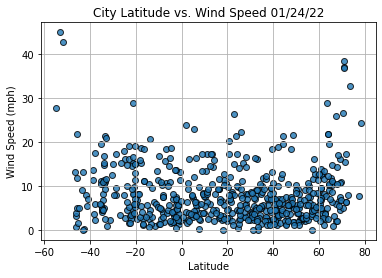

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()